##1:  Load and Pre-process the Dataset

In [1]:
import pandas as pd

# Upload your file first in Colab: world_happiness_combined.csv
df = pd.read_csv("world_happiness_combined.csv", delimiter=';')
df.columns = df.columns.str.lower().str.replace(' ', '_')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=False)

for col in df.columns:
    if col not in ['country', 'regional_indicator']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['regional_indicator'].fillna("Unknown", inplace=True)
df.head()


/tmp/ipython-input-1-4059576317.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['regional_indicator'].fillna("Unknown", inplace=True)


,ranking,country,regional_indicator,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,1,Switzerland,Western Europe,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941,2015
1,2,Iceland,Western Europe,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371,2015
2,3,Denmark,Western Europe,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382,2015
3,4,Norway,Western Europe,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860,2015
4,5,Canada,North America and ANZ,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285,2015


 ## 2: Visualize Happiness Score Distribution

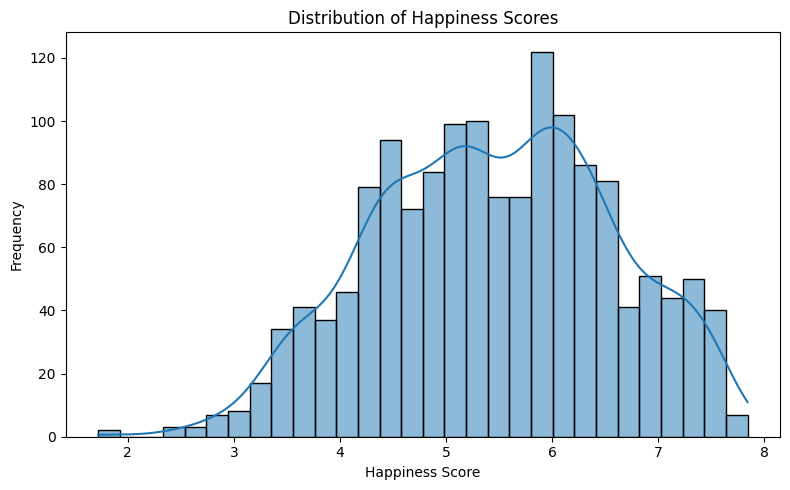

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['happiness_score'], bins=30, kde=True)
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## 3:Top and Bottom 10 Happiest Countries

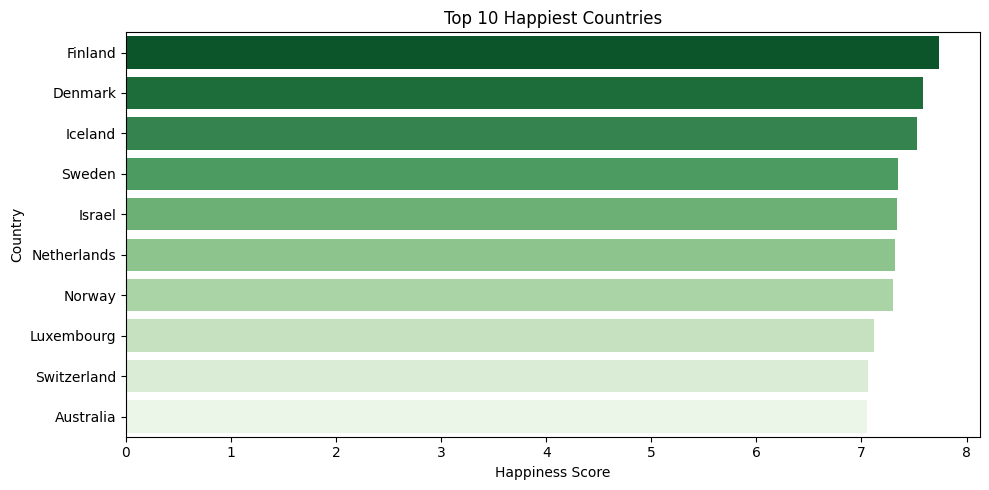

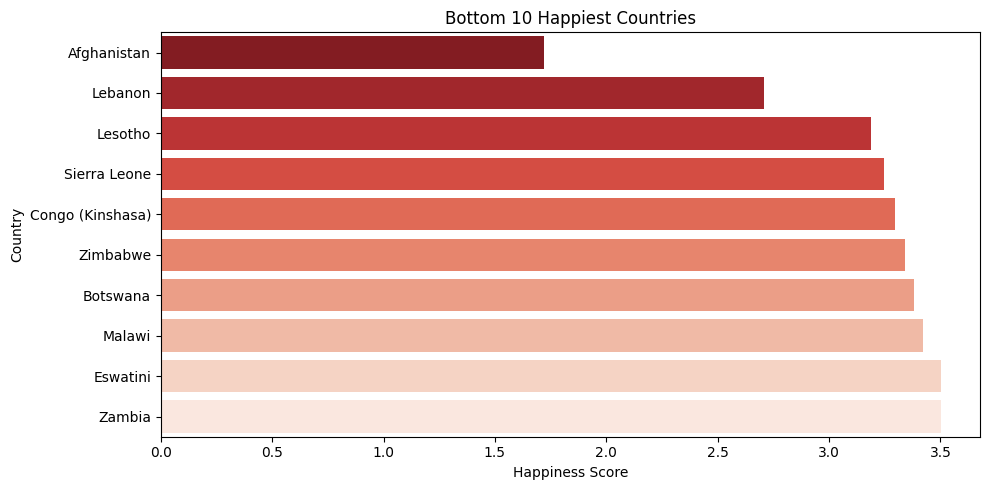

In [3]:
latest_year = df['year'].max()
top10 = df[df['year'] == latest_year].nlargest(10, 'happiness_score')
bottom10 = df[df['year'] == latest_year].nsmallest(10, 'happiness_score')

# Top 10 (Green)
plt.figure(figsize=(10, 5))
sns.barplot(x='happiness_score', y='country', data=top10, hue='country', palette='Greens_r', dodge=False, legend=False)
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Bottom 10 (Red)
plt.figure(figsize=(10, 5))
sns.barplot(x='happiness_score', y='country', data=bottom10, hue='country', palette='Reds_r', dodge=False, legend=False)
plt.title("Bottom 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## 4: Correlation of Happiness and Indicators

In [4]:
# Drop non-numeric columns and compute correlations
numeric_df = df.drop(columns=['ranking', 'year', 'country', 'regional_indicator'])
correlation_matrix = numeric_df.corr()


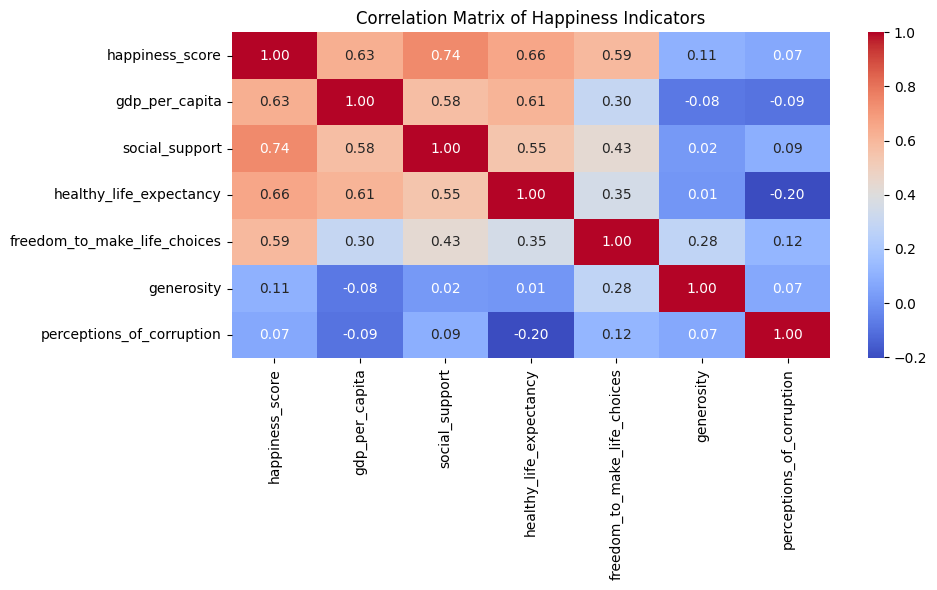

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Happiness Indicators")
plt.tight_layout()
plt.show()


## 5: Year-over-Year Comparison for Top 5 Countries

In [6]:
#Find Top 5 Countries in Latest Year
top5_countries = df[df['year'] == latest_year].nlargest(5, 'happiness_score')['country']
df_top5 = df[df['country'].isin(top5_countries)]


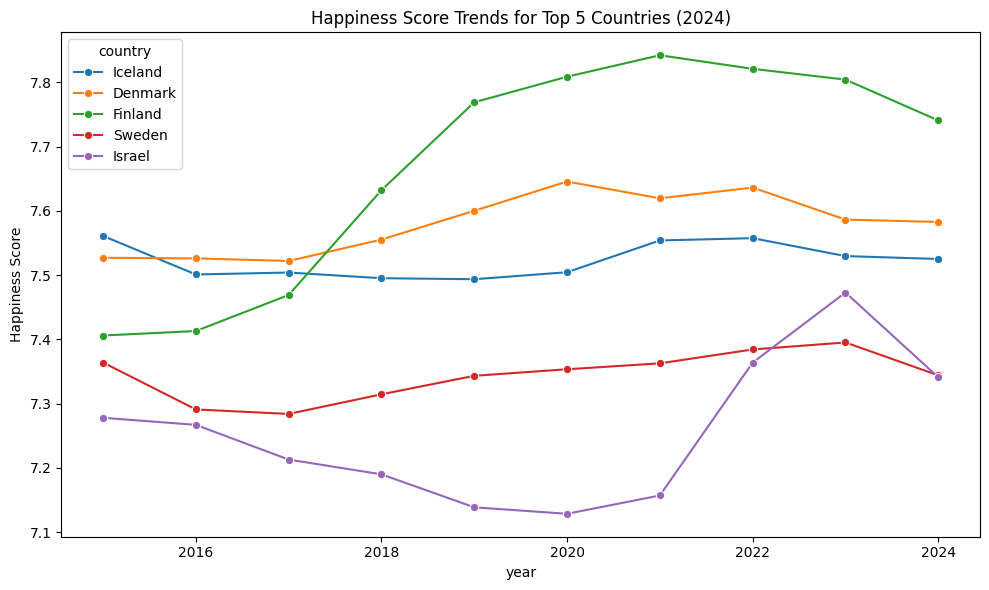

In [7]:
#Line Plot of Happiness Score Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top5, x='year', y='happiness_score', hue='country', marker='o')
plt.title("Happiness Score Trends for Top 5 Countries (2024)")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()



## 6: World Map of Happiness

In [8]:
#Choropleth Map Using Plotly
import plotly.express as px

df_map = df[df['year'] == latest_year]
fig = px.choropleth(df_map, locations="country", locationmode="country names",
                    color="happiness_score", hover_name="country",
                    color_continuous_scale="Viridis",
                    title=f"World Happiness Score Map ({latest_year})")
fig.show()


## 7: Impact of GDP on Happiness

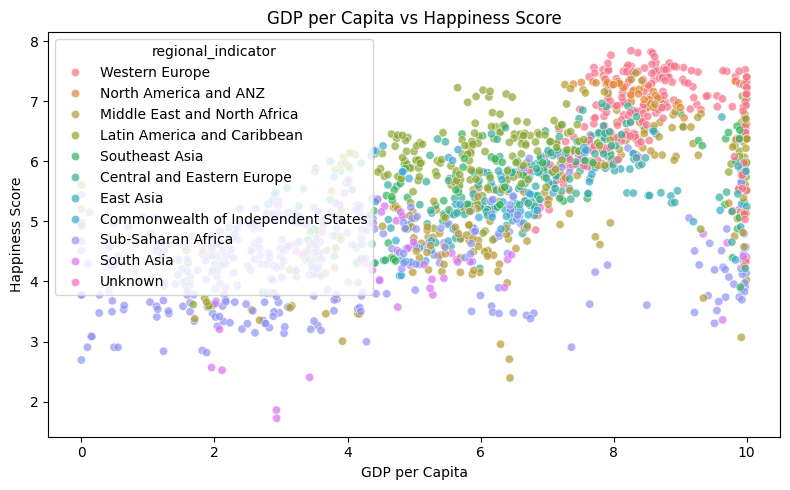

In [9]:
#Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='gdp_per_capita', y='happiness_score', hue='regional_indicator', alpha=0.7)
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()


## 8: Compare Continents or Regions

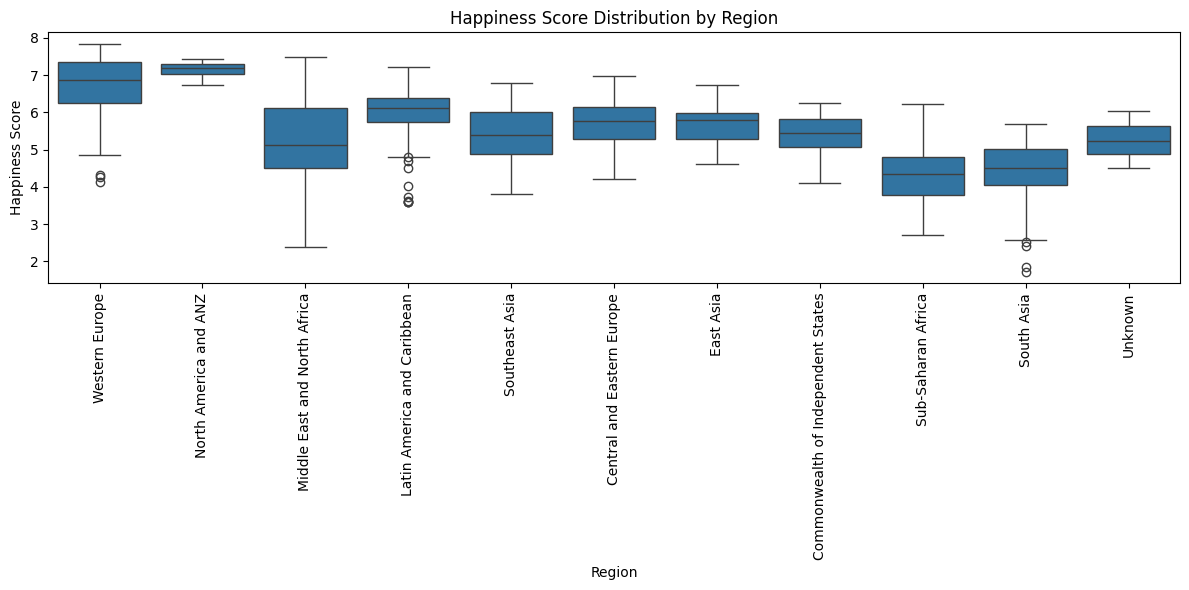

In [10]:
#Box Plot by Region

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='regional_indicator', y='happiness_score')
plt.xticks(rotation=90)
plt.title("Happiness Score Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()

## 9:Indicator Importance (Feature Contribution)

In [11]:
#a. Linear Regression to Find Feature Weights

from sklearn.linear_model import LinearRegression

# Select predictors and target
X = df[['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
        'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]
y = df['happiness_score']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values()

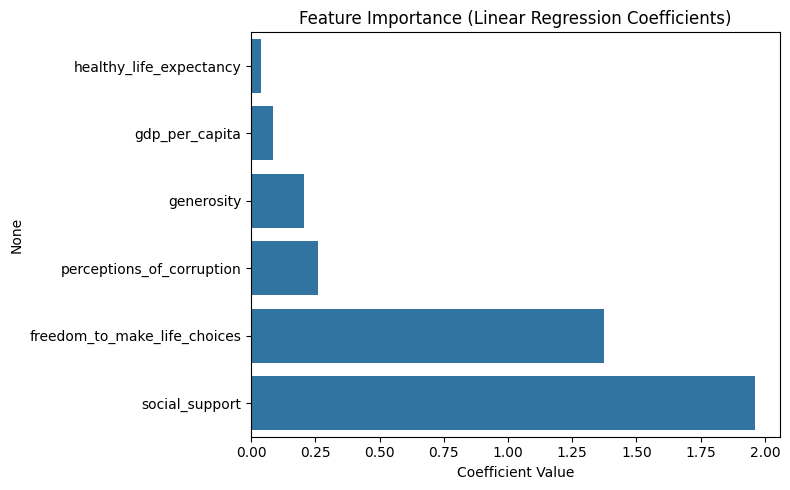

In [12]:
#b. Bar Plot of Feature Weights

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

## 10: Interactive Dashboard

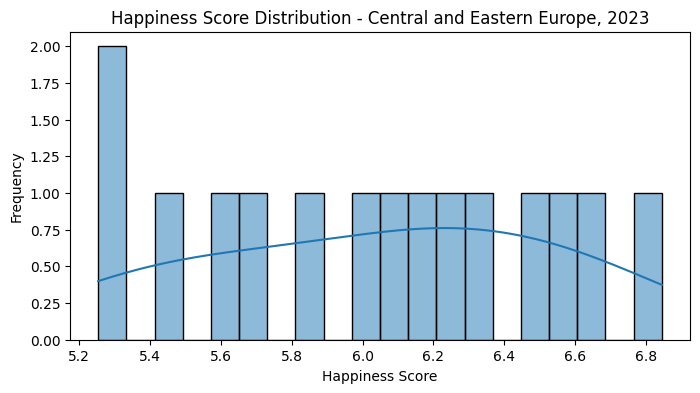

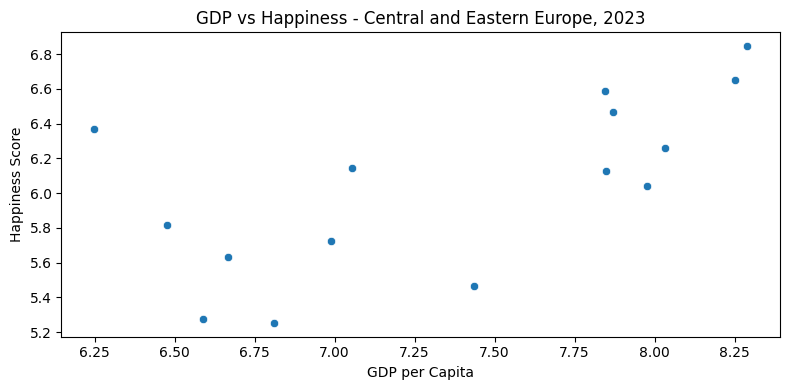

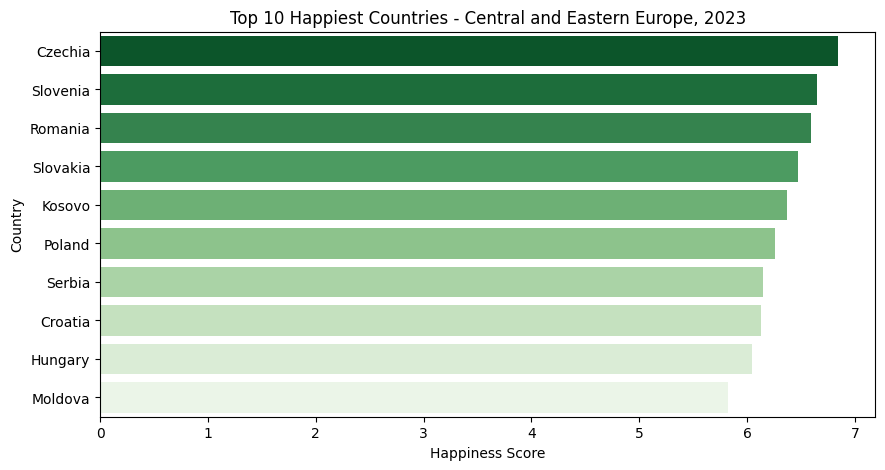

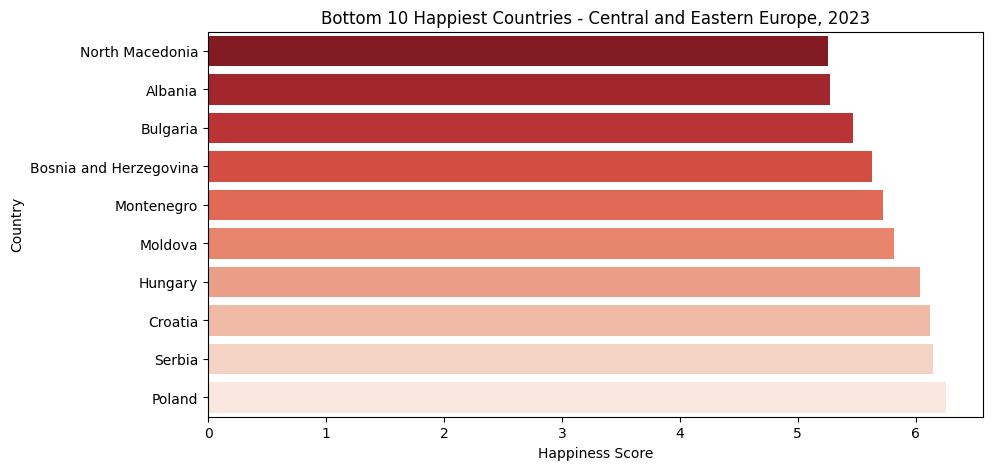

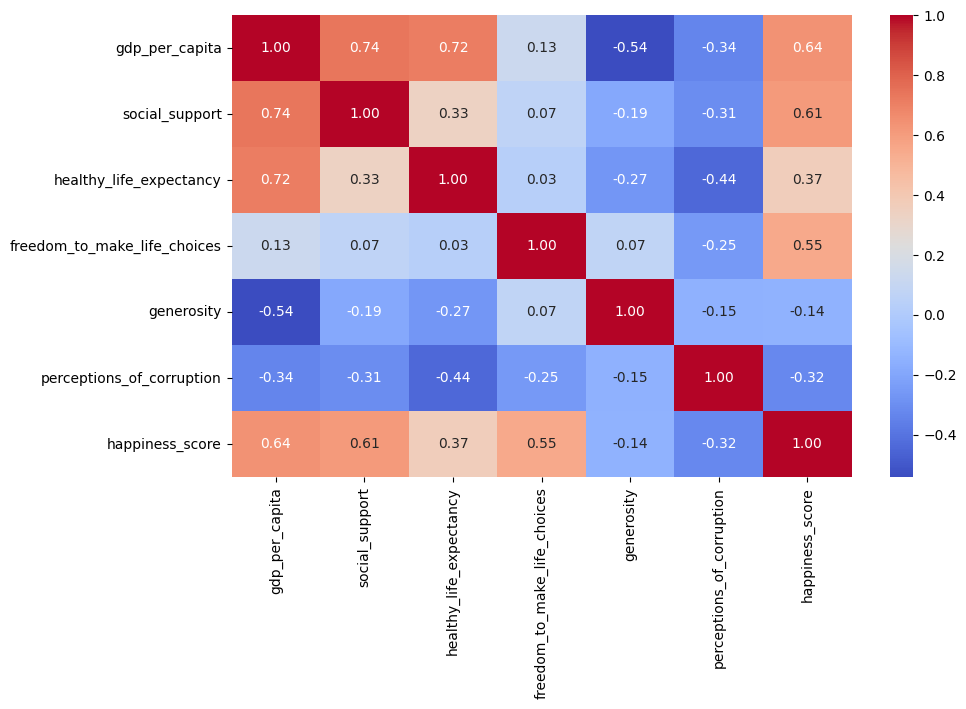

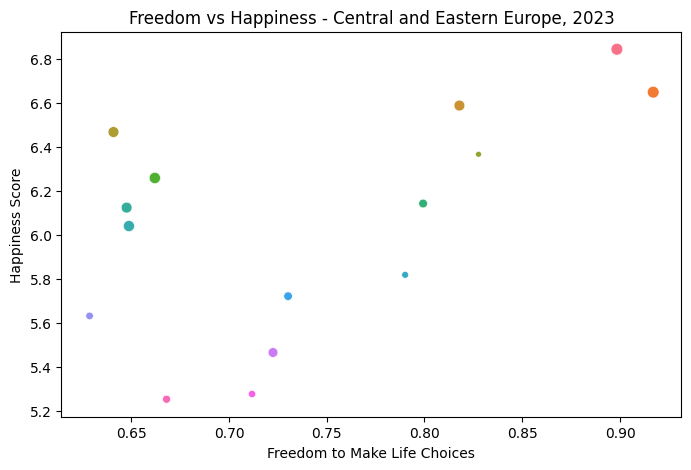

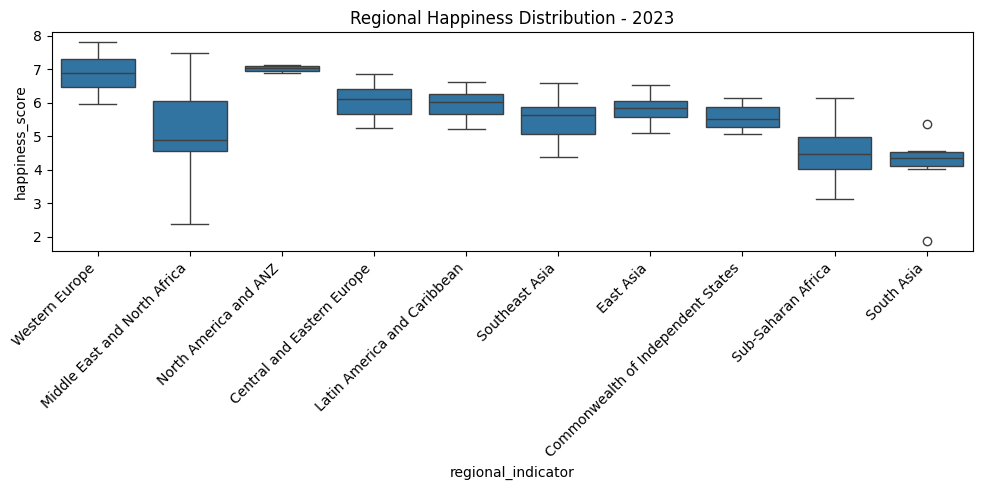

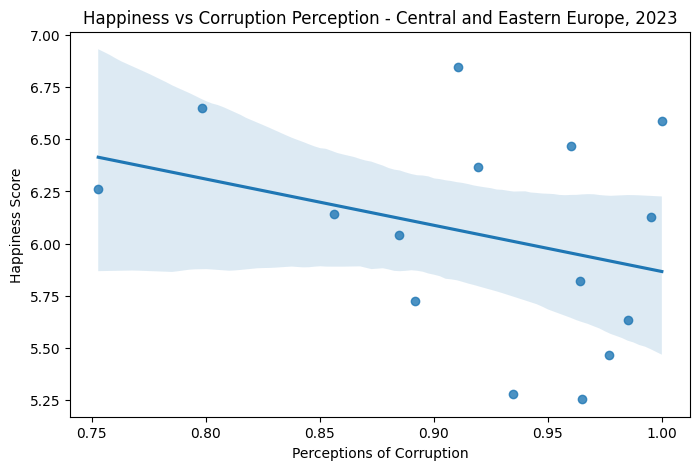

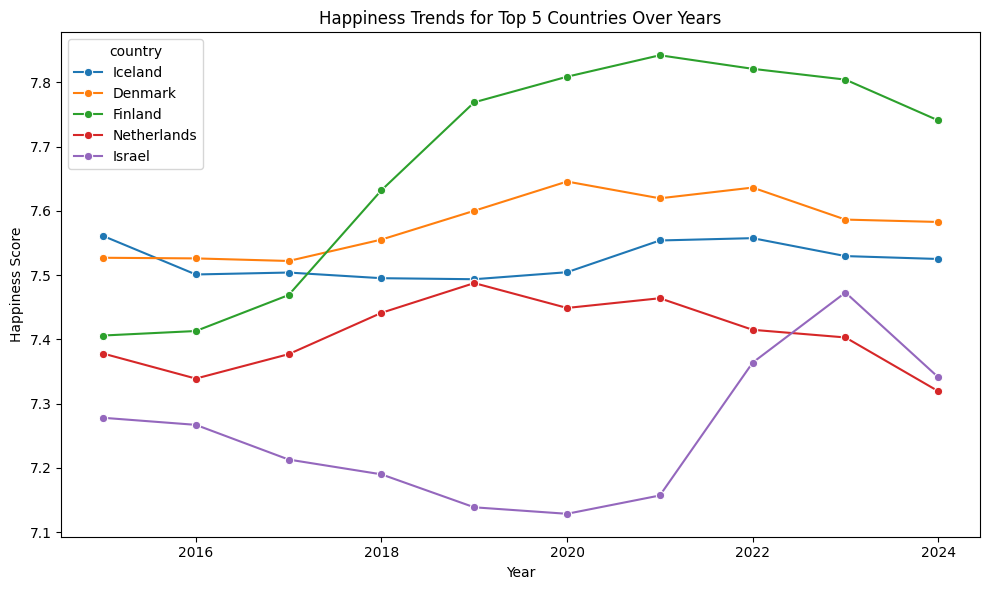

In [13]:
# 📘 Global Happiness Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import ipywidgets as widgets
from IPython.display import display

# Enable Plotly rendering in Colab
pio.renderers.default = "colab"

# Load data
df = pd.read_csv("world_happiness_combined.csv", delimiter=';')
df.columns = df.columns.str.lower().str.replace(' ', '_')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=False)
for col in df.columns:
    if col not in ['country', 'regional_indicator']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df['regional_indicator'].fillna("Unknown", inplace=True)

# Interactive Dashboard with ipywidgets
year_selector = widgets.IntSlider(value=2024, min=int(df['year'].min()), max=int(df['year'].max()), step=1, description='Year:')
region_selector = widgets.Dropdown(options=sorted(df['regional_indicator'].unique()), description='Region:')

def update_dashboard(year, region):
    filtered = df[(df['year'] == year) & (df['regional_indicator'] == region)]

    if filtered.empty:
        print("No data available for this selection.")
        return

    # Chart 1: Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(filtered['happiness_score'], bins=20, kde=True)
    plt.title(f'Happiness Score Distribution - {region}, {year}')
    plt.xlabel('Happiness Score')
    plt.ylabel('Frequency')
    plt.show()

    # Chart 2: GDP vs Happiness
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=filtered, x='gdp_per_capita', y='happiness_score')
    plt.title(f'GDP vs Happiness - {region}, {year}')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Happiness Score')
    plt.tight_layout()
    plt.show()

    # Chart 3: Top 10 Countries
    top10 = filtered.nlargest(10, 'happiness_score')
    plt.figure(figsize=(10, 5))
    sns.barplot(data=top10, x='happiness_score', y='country', hue='country', dodge=False, legend=False, palette='Greens_r')
    plt.title(f'Top 10 Happiest Countries - {region}, {year}')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.show()

    # Chart 4: Bottom 10 Countries
    bottom10 = filtered.nsmallest(10, 'happiness_score')
    plt.figure(figsize=(10, 5))
    sns.barplot(data=bottom10, x='happiness_score', y='country', hue='country', dodge=False, legend=False, palette='Reds_r')
    plt.title(f'Bottom 10 Happiest Countries - {region}, {year}')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.show()

    # Chart 5: Correlation Heatmap
    indicators = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
    corr = filtered[indicators + ['happiness_score']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

    # Chart 6: Freedom vs Happiness Bubble
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=filtered, x='freedom_to_make_life_choices', y='happiness_score', size='gdp_per_capita', hue='country', legend=False)
    plt.title(f'Freedom vs Happiness - {region}, {year}')
    plt.xlabel('Freedom to Make Life Choices')
    plt.ylabel('Happiness Score')
    plt.show()

    # Chart 7: Regional Happiness Distribution
    regional_data = df[df['year'] == year]
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=regional_data, x='regional_indicator', y='happiness_score')
    plt.title(f'Regional Happiness Distribution - {year}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Chart 8: Happiness vs Corruption Perception
    plt.figure(figsize=(8, 5))
    sns.regplot(data=filtered, x='perceptions_of_corruption', y='happiness_score')
    plt.title(f'Happiness vs Corruption Perception - {region}, {year}')
    plt.xlabel('Perceptions of Corruption')
    plt.ylabel('Happiness Score')
    plt.show()

    # Chart 9: Yearly Trend for Top 5 Countries
    top5_countries = df[df['year'] == year].nlargest(5, 'happiness_score')['country'].tolist()
    trend_data = df[df['country'].isin(top5_countries)]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=trend_data, x='year', y='happiness_score', hue='country', marker='o')
    plt.title('Happiness Trends for Top 5 Countries Over Years')
    plt.xlabel('Year')
    plt.ylabel('Happiness Score')
    plt.tight_layout()
    plt.show()

widgets.interact(update_dashboard, year=year_selector, region=region_selector);

## 11: Happiness vs. Corruption Perception

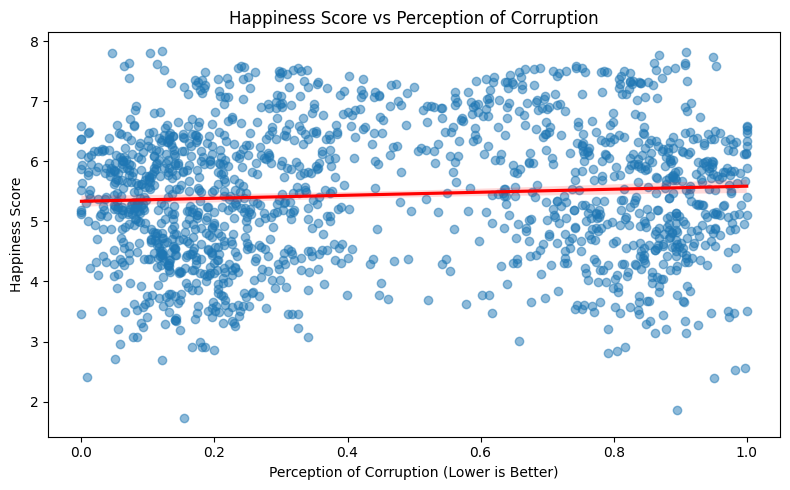

In [19]:
#Scatter Plot with Trendline

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='perceptions_of_corruption', y='happiness_score',
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title("Happiness Score vs Perception of Corruption")
plt.xlabel("Perception of Corruption (Lower is Better)")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()

## 12: Cluster Countries by Happiness Factors

In [20]:
#K-Means Clustering

from sklearn.cluster import KMeans

cluster_data = df[['gdp_per_capita', 'social_support', 'healthy_life_expectancy']].dropna()
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(cluster_data)

# Add cluster labels
cluster_data['cluster'] = clusters

In [21]:
#3D Scatter Plot of Clusters

fig = px.scatter_3d(cluster_data, x='gdp_per_capita', y='social_support', z='healthy_life_expectancy',
                    color='cluster', title="Clusters of Countries by Happiness Factors")
fig.show()

## 13: Animated Map of Happiness Over Time

In [22]:
 #Animated Choropleth with Plotly

fig = px.choropleth(df, locations="country", locationmode="country names",
                    color="happiness_score", hover_name="country",
                    animation_frame="year", color_continuous_scale="Turbo",
                    title="Animated Happiness Score Map (2015–2024)")
fig.show()

## 14: Happiness Score vs. Freedom of Choice

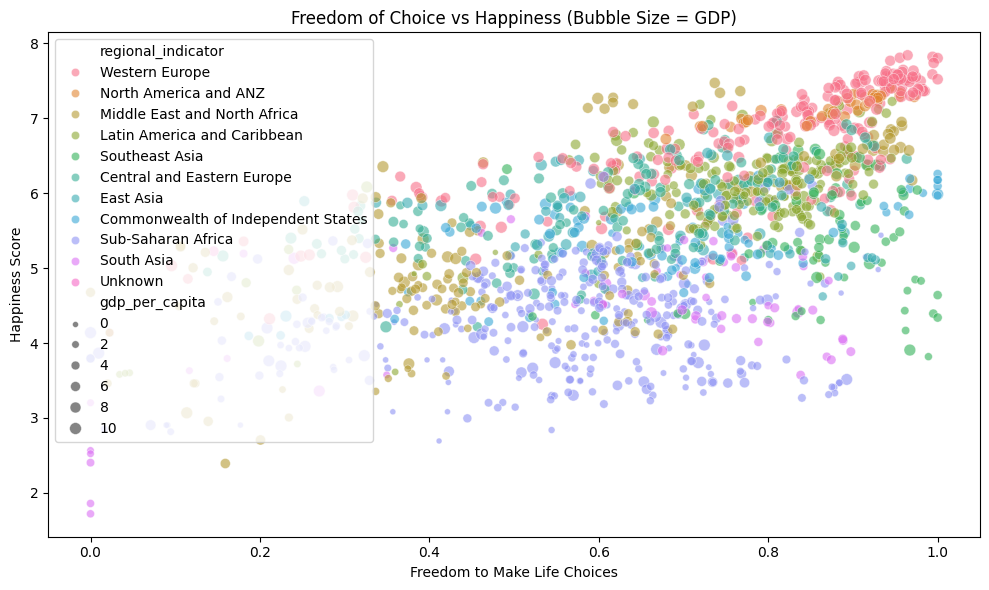

In [23]:
#Bubble Chart

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='freedom_to_make_life_choices', y='happiness_score',
                size='gdp_per_capita', hue='regional_indicator', alpha=0.6)
plt.title("Freedom of Choice vs Happiness (Bubble Size = GDP)")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()